# WeatherPy
----



In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



## Generate Cities List

In [25]:
north_lat_lngs = []
north_cities = []
south_cities =[]

# Create a set of random lat and lng combinations
north_lats = np.random.uniform(low=0, high=90.000, size=600)
north_lngs = np.random.uniform(low=-180.000, high=180.000, size=600)
north_lat_lngs = zip(north_lats, north_lngs)

# Identify nearest city for each lat, lng combination
for north_lat_lng in north_lat_lngs:
    north_city = citipy.nearest_city(north_lat_lng[0], north_lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if north_city not in north_cities:
        north_cities.append(north_city)

# Create a set of random lat and lng combinations
south_lats = np.random.uniform(low=-90.000, high=0, size=1600)
south_lngs = np.random.uniform(low=-180.000, high=180.000, size=1600)
south_lat_lngs = zip(south_lats, south_lngs)

# Identify nearest city for each lat, lng combination
for south_lat_lng in south_lat_lngs:
    south_city = citipy.nearest_city(south_lat_lng[0], south_lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if south_city not in south_cities:
        south_cities.append(south_city)
        
# Print the city count to confirm sufficient count
print(f'Exported {len(north_cities)} cities in the Northern Hemisphere')
print(f'Exported {len(south_cities)} cities in the Northern Hemisphere')

Exported 360 cities in the Northern Hemisphere
Exported 304 cities in the Northern Hemisphere


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
clouds = []
country = []
date = []
tempmax = []
humidity = []
lat = []
lon = []
windspeed = []
cityname = []

# use loop to get all the column value.
# use try to exclusive the city that can't be found.

#doesn't mention the task relate to temperate history. Therefore, use the current API.
k=1
for city in north_cities:
    if len(cityname)<270:
        units="imperial"
        url_weater = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units={units}"
        weater_detail = requests.get(url_weater).json()
        try: 
            clouds.append(weater_detail["clouds"]["all"])
            country.append(weater_detail["sys"]["country"])
            date.append(weater_detail["dt"])
            tempmax.append(weater_detail["main"]['temp_max'])
            humidity.append(weater_detail["main"]['humidity'])
            lat.append(weater_detail["coord"]["lat"])  
            lon.append(weater_detail["coord"]["lon"])
            windspeed.append(weater_detail["wind"]["speed"])
            cityname.append(weater_detail["name"])
            print(f"Processing record {k}|{city}")
            k+=1
        except (KeyError):
            print("City is not found. skipping.")

for city in south_cities:
    if len(cityname)<540:
        units="imperial"
        url_weater = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units={units}"
        weater_detail = requests.get(url_weater).json()
        try: 
            clouds.append(weater_detail["clouds"]["all"])
            country.append(weater_detail["sys"]["country"])
            date.append(weater_detail["dt"])
            tempmax.append(weater_detail["main"]['temp_max'])
            humidity.append(weater_detail["main"]['humidity'])
            lat.append(weater_detail["coord"]["lat"])  
            lon.append(weater_detail["coord"]["lon"])
            windspeed.append(weater_detail["wind"]["speed"])
            cityname.append(weater_detail["name"])
            print(f"Processing record {k}|{city}")
            k+=1
        except (KeyError):
            print("City is not found. skipping.")


City is not found. skipping.
Processing record 1|thompson
Processing record 2|killarney
Processing record 3|ilulissat
Processing record 4|tuktoyaktuk
Processing record 5|narsaq
Processing record 6|aklavik
Processing record 7|qasigiannguit
Processing record 8|songjianghe
Processing record 9|kapaa
City is not found. skipping.
Processing record 10|half moon bay
Processing record 11|cherskiy
Processing record 12|tumaco
Processing record 13|severo-yeniseyskiy
Processing record 14|ciudad bolivar
Processing record 15|karpogory
City is not found. skipping.
Processing record 16|chowchilla
Processing record 17|lasa
Processing record 18|tasiilaq
Processing record 19|sebinkarahisar
Processing record 20|baruun-urt
Processing record 21|butaritari
Processing record 22|acajutla
Processing record 23|linjiang
Processing record 24|nazas
Processing record 25|bonthe
Processing record 26|sao filipe
Processing record 27|turukhansk
Processing record 28|olafsvik
Processing record 29|dikson
Processing record 30

Processing record 240|west wendover
Processing record 241|puerto escondido
City is not found. skipping.
Processing record 242|katsuura
Processing record 243|acapulco
Processing record 244|aldan
Processing record 245|omsukchan
Processing record 246|abilene
Processing record 247|valley city
Processing record 248|shymkent
Processing record 249|buchanan
Processing record 250|san quintin
Processing record 251|grindavik
Processing record 252|lucani
Processing record 253|kuching
City is not found. skipping.
Processing record 254|trairi
Processing record 255|mezen
Processing record 256|monroe
Processing record 257|san mateo del mar
Processing record 258|preobrazheniye
City is not found. skipping.
Processing record 259|mandalgovi
Processing record 260|trincomalee
Processing record 261|karakol
Processing record 262|ithaca
Processing record 263|san andres
Processing record 264|puerto ayora
City is not found. skipping.
Processing record 265|moron
Processing record 266|pavlovsk
Processing record 26

Processing record 483|port shepstone
Processing record 484|meulaboh
City is not found. skipping.
Processing record 485|port lincoln
Processing record 486|ilave
Processing record 487|general pico
Processing record 488|quelimane
Processing record 489|gizo
Processing record 490|ascension
City is not found. skipping.
City is not found. skipping.
Processing record 491|obidos
Processing record 492|richards bay
Processing record 493|labuhan
Processing record 494|buala
Processing record 495|sao jose da coroa grande
Processing record 496|srandakan
Processing record 497|ampanihy
Processing record 498|mocuba
Processing record 499|mareeba
Processing record 500|tres passos
Processing record 501|rafaela
Processing record 502|matara
Processing record 503|kasongo-lunda
Processing record 504|letlhakane
Processing record 505|kiunga
Processing record 506|karasburg
Processing record 507|mtwara
Processing record 508|kupang
Processing record 509|harper
Processing record 510|planaltina
Processing record 511|

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_df = pd.DataFrame({"City":cityname, 
                        "Lat":lat,
                        "Lng":lon,
                        "Max Temp":tempmax,
                        "Humidity":humidity,
                        "Cloudiness":clouds, 
                        "Wind Speed":windspeed,
                        "Country":country, 
                        "Date":date})

#Exporting data to csv
weather_df.to_csv(f'../{output_data_file}')

print(f' There is a total of {len(weather_df.index)} rows of values are contained in this DataFrame')

#Displaying dataframe
weather_df.head()

 There is a total of 540 rows of values are contained in this DataFrame


City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0     Thompson  55.7435  -97.8558    -19.08        95          61        6.98   
1    Killarney  52.0500   -9.5167     51.19        77         100       10.22   
2    Ilulissat  69.2167  -51.1000      3.22        51          75        2.30   
3  Tuktoyaktuk  69.4541 -133.0374    -15.95        99         100        8.52   
4       Narsaq  60.9167  -46.0500      5.22        71          62        2.19   

  Country        Date  
0      CA  1647000747  
1      IE  1647000747  
2      GL  1647000747  
3      CA  1647000747  
4      GL  1647000748

In [28]:
Count=[]
Mean=[]
Std=[]
Min=[]
Max=[]
Lowerq =[]
Mediq=[]
Upperq =[]

column_name = weather_df.columns.tolist()
for x in column_name:
    try: 
        Mean.append(weather_df[x].mean())
        Count.append(weather_df[x].count())
        Std.append(weather_df[x].std())
        Min.append(weather_df[x].min())
        Max.append(weather_df[x].max())
        Lowerq.append(weather_df[x].quantile(.25))
        Mediq.append(weather_df[x].quantile(.5))
        Upperq.append(weather_df[x].quantile(.75))


    except TypeError:
        Mean=Mean
        Count=Count
        Std=Std
        Min=Min
        Max=Max
        Lowerq=Lowerq
        Mediq=Mediq
        Upperq=Upperq
        
all_rows = [Count,Mean,Std,Min,Lowerq,Mediq,Upperq,Max]
Summary_df = pd.DataFrame(all_rows, columns=['Lat', 'Lng',"Max Temp","Humidity","Cloudiness","Wind Speed","Date"],
                  index=['count', 'mean',"std","min","25%","50%","75%","max"])
Summary_df

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  540.000000  540.000000  540.000000  540.000000  540.000000  540.000000   
mean    10.889943   15.236907   59.836500   71.237037   59.216667    8.241685   
std     33.705080   91.055189   27.825713   21.130202   38.143359    6.228196   
min    -54.800000 -175.200000  -29.990000    6.000000    0.000000    0.000000   
25%    -17.508325  -63.779875   45.620000   61.000000   20.000000    3.462500   
50%      4.884500   18.181350   69.050000   76.000000   71.500000    6.910000   
75%     40.613050  102.232425   80.152500   87.000000   99.000000   11.172500   
max     78.218600  179.316700  103.780000  100.000000  100.000000   35.790000   

               Date  
count  5.400000e+02  
mean   1.647001e+09  
std    6.912093e+01  
min    1.647000e+09  
25%    1.647001e+09  
50%    1.647001e+09  
75%    1.647001e+09  
max    1.647001e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. <br>
___From the above DataFrame,the maximum of humidity is 100%.___<br>
___Therefore, no no cities that have humidity > 100%___ <br>
___This step is skipped.___

In [29]:
#  Get the indices of cities that have humidity over 100%.


In [30]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


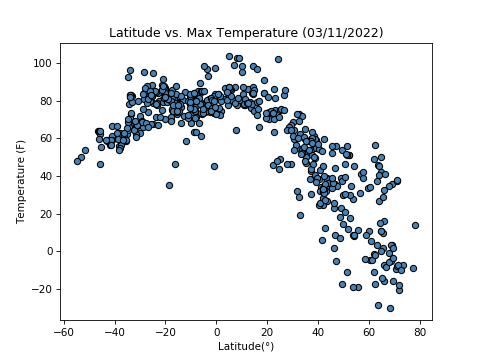

In [31]:
%matplotlib notebook
import datetime

today = time.strftime("%m/%d/%Y")
LatitudeTemperature = weather_df.loc[(weather_df["Date"] == 1646986138)]
# Creat the chart
plt.scatter(weather_df["Lat"], weather_df["Max Temp"],facecolor = "steelblue", edgecolor = "black")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude vs. Max Temperature ({today})")
plt.show()

# Save the chart
plt.savefig("../output_data/Latitude vs. Temperature (Max).png")

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


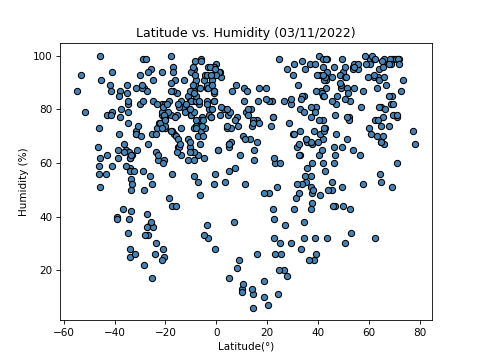

In [32]:
# Creat the chart
plt.scatter(weather_df["Lat"], weather_df["Humidity"],facecolor = "steelblue", edgecolor = "black")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs. Humidity ({today})")
plt.show()

# Save the chart
plt.savefig("../output_data/Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


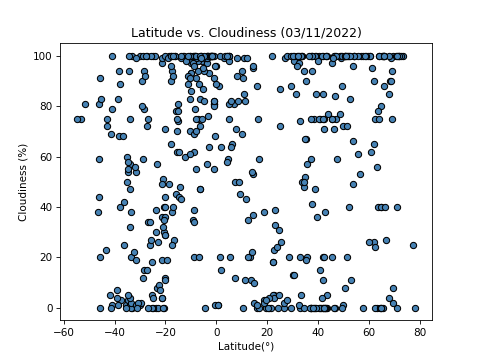

In [33]:
# Creat the chart
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"],facecolor = "steelblue", edgecolor = "black")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs. Cloudiness ({today})")
plt.show()

# Save the chart
plt.savefig("../output_data/Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


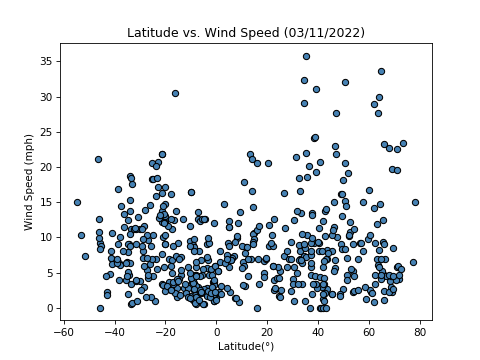

In [34]:
# Creat the chart
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],facecolor = "steelblue", edgecolor = "black")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs. Wind Speed ({today})")
plt.show()

# Save the chart
plt.savefig("../output_data/Latitude vs. Wind Speed.png")

## Linear Regression

In [35]:
northern_df = weather_df.loc[weather_df["Lat"].astype(float) >0]
southern_df = weather_df.loc[weather_df["Lat"].astype(float) <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


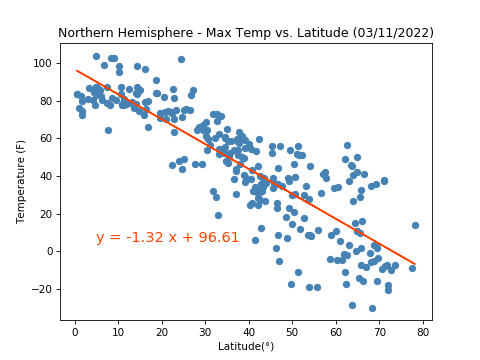

The r-value is: -0.8589364039466263


In [36]:
# Print out the r-squared value along with the plot.
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(5,5),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Temperature (F)")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


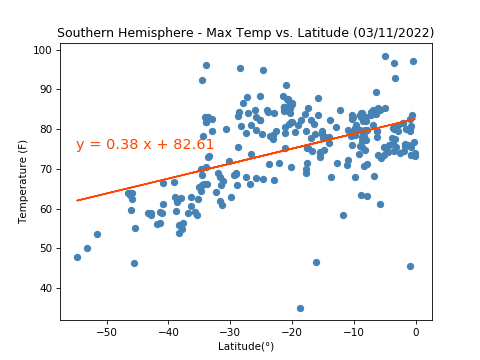

The r-value is: 0.4831578097144663


In [37]:
# Print out the r-squared value along with the plot.
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(-55,75),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Temperature (F)")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()


# Save the chart
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


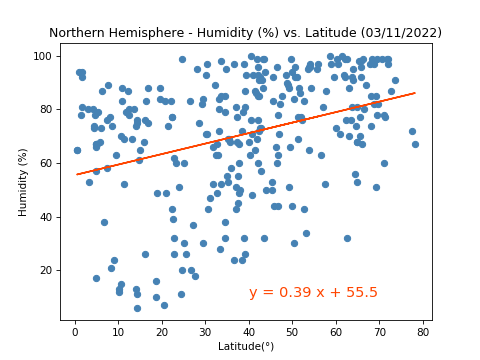

The r-value is: 0.3421653106643312


In [38]:
# Print out the r-squared value along with the plot.
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(40,10),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


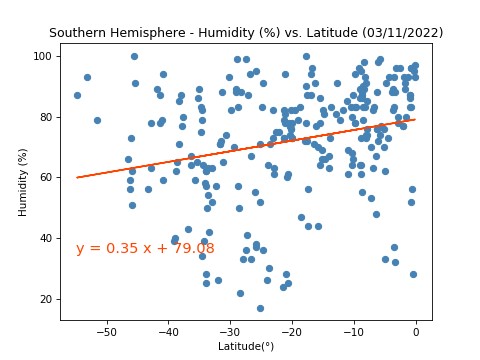

The r-value is: 0.25082828675322716


In [39]:
# Print out the r-squared value along with the plot.
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(-55,35),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


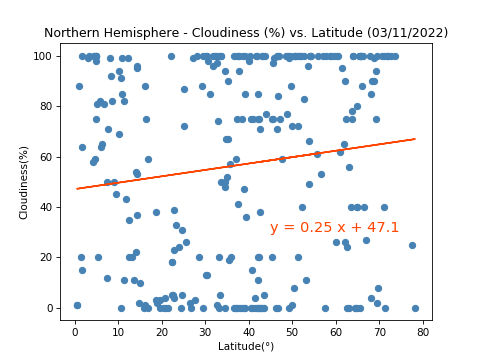

The r-value is: 0.12866337914650075


In [40]:
# Print out the r-squared value along with the plot.
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(45,30),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Cloudiness(%)")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


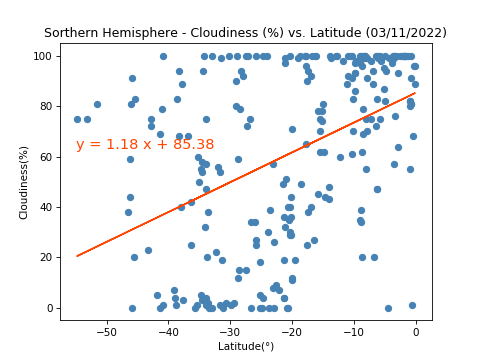

The r-value is: 0.43864587799900207


In [41]:
# Print out the r-squared value along with the plot.
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(-55,63),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Cloudiness(%)")
plt.title(f"Sorthern Hemisphere - Cloudiness (%) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_data/Sorthern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


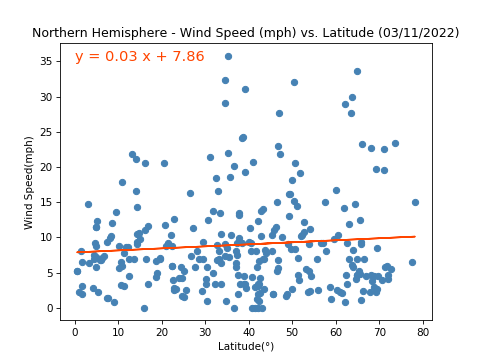

The r-value is: 0.08456381598458651


In [42]:
# Print out the r-squared value along with the plot.
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(0,35),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Wind Speed(mph)")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


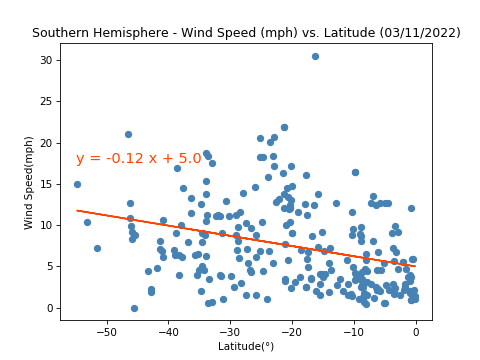

The r-value is: -0.3111344780476517


In [43]:
# Print out the r-squared value along with the plot.
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(-55,17.5),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Wind Speed(mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")